In [1]:
import numpy as np
from PIL import Image

def transfer_pixels(source_path, target_path, timestep, max_timestep=1000, output_size=(512, 512)):
    # Load and resize images
    source = Image.open(source_path).resize(output_size)
    target = Image.open(target_path).resize(output_size)
    
    # Convert images to numpy arrays
    source_array = np.array(source)
    target_array = np.array(target)
    
    # Calculate the transfer percentage using a non-linear function
    transfer_percentage = (timestep / max_timestep) ** 2  # Quadratic function
    
    # Create a mask for pixel transfer
    mask = np.random.random(target_array.shape[:2]) < transfer_percentage
    
    # Apply the mask to all color channels
    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
    
    # Create the result array
    result_array = np.where(mask, source_array, target_array)
    
    # Convert the result array back to an image
    result_image = Image.fromarray(result_array.astype(np.uint8))
    
    return result_image

In [1]:
import torch
from torchvision import transforms
from PIL import Image

def transfer_pixels(source_path, target_path, timestep, max_timestep=1000, output_size=(512, 512)):
    # Define image transformation
    transform = transforms.Compose([
        transforms.Resize(output_size),
        transforms.ToTensor()
    ])

    # Load and transform images
    source = transform(Image.open(source_path))
    target = transform(Image.open(target_path))
    
    # Calculate the transfer percentage using a non-linear function
    transfer_percentage = (timestep / max_timestep) ** 2  # Quadratic function
    
    # Create a mask for pixel transfer
    mask = torch.rand(target.shape[1:]) < transfer_percentage
    
    # Expand mask to match the image dimensions
    mask = mask.unsqueeze(0).expand_as(target)
    
    # Create the result tensor
    result_tensor = torch.where(mask, source, target)
    
    # Convert the result tensor back to an image
    result_image = transforms.ToPILImage()(result_tensor)
    
    return result_image

/home/eranario/miniconda3/envs/lightning/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


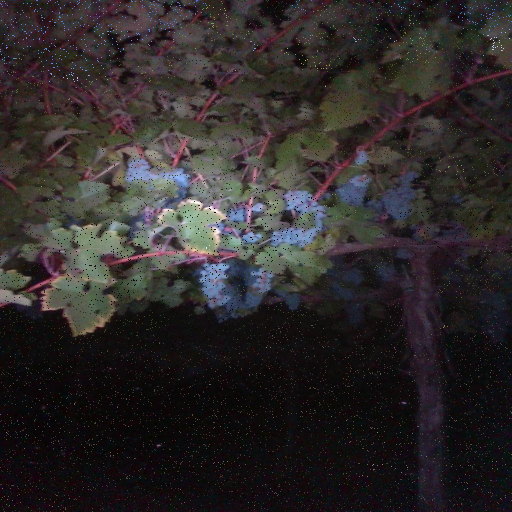

In [4]:
target_path = "/group/jmearlesgrp/data/yolo_grl_data/BordenNight/Real/train/images/091120-Color1-1599682078323729112.jpg"
source_path = "/group/jmearlesgrp/data/yolo_grl_data/BordenNight/Synthetic/images/00000.jpg"
transfer_pixels(source_path, target_path, timestep=200)

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

def transfer_pixels_video(source_path, target_path, output_path, max_timestep=1000, output_size=(500, 500), fps=30, duration=5):
    # Load and resize images
    source = Image.open(source_path).resize(output_size)
    target = Image.open(target_path).resize(output_size)
    
    # Convert images to numpy arrays
    source_array = np.array(source)
    target_array = np.array(target)
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    def make_frame(t):
        timestep = int(t * max_timestep / duration)
        
        # Calculate the transfer percentage using a non-linear function
        transfer_percentage = (timestep / max_timestep) ** 2  # Quadratic function
        
        # Create a mask for pixel transfer
        mask = np.random.random(target_array.shape[:2]) < transfer_percentage
        
        # Apply the mask to all color channels
        mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        
        # Create the result array
        result_array = np.where(mask, source_array, target_array)
        
        # Update the plot
        ax.clear()
        ax.imshow(result_array)
        ax.axis('off')
        ax.set_title(f'Timestep: {timestep}/{max_timestep}')
        
        # Convert the plot to an image
        return mplfig_to_npimage(fig)
    
    # Create and save the video
    animation = VideoClip(make_frame, duration=duration)
    animation.write_videofile(output_path, fps=fps)
    
    plt.close(fig)

In [6]:
target_path = "/group/jmearlesgrp/data/yolo_grl_data/BordenNight/Real/train/images/091120-Color1-1599682078323729112.jpg"
source_path = "/group/jmearlesgrp/data/yolo_grl_data/BordenNight/Synthetic/images/00000.jpg"
transfer_pixels_video(source_path, target_path, output_path='/group/jmearlesgrp/intermediate_data/eranario/Active-Learning/ControlNet_logs/tests/transfer.mp4')

Moviepy - Building video /group/jmearlesgrp/intermediate_data/eranario/Active-Learning/ControlNet_logs/tests/transfer.mp4.
Moviepy - Writing video /group/jmearlesgrp/intermediate_data/eranario/Active-Learning/ControlNet_logs/tests/transfer.mp4



Moviepy - Done !
Moviepy - video ready /group/jmearlesgrp/intermediate_data/eranario/Active-Learning/ControlNet_logs/tests/transfer.mp4
